### Импорт необходимых библиотек и настройка графического стиля

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.style.use(['Solarize_Light2'])

### Загрузка датасета и его чтение

In [3]:
from google.colab import files
uploaded = files.upload()

Saving autos.csv to autos.csv


In [4]:
data = pd.read_csv('autos.csv', low_memory = False)

### Датафрейм: определение размера и основных характеристик

In [5]:
data.shape

(371528, 21)

В датафрейме 371528 строк и 21 столбец

In [6]:
# Перевожу названия полей в общепринятый формат правописания
data = data.rename(columns = {'dateCrawled': 'date_crawled',
                              'offerType': 'offer_type',
                              'vehicleType': 'vehicle_type',
                              'yearOfRegistration': 'year_of_registration',
                              'powerPS': 'power_PS',
                              'monthOfRegistration': 'month_of_registration',
                              'fuelType': 'fuel_type',
                              'notRepairedDamage': 'not_repaired_damage',
                              'dateCreated': 'date_created',
                              'nrOfPictures': 'nr_of_pictures',
                              'postalCode': 'postal_code',
                              'lastSeen': 'last_seen'})
print(*data.columns, sep = '\n')

index
date_crawled
name
seller
offer_type
price
abtest
vehicle_type
year_of_registration
gearbox
power_PS
model
kilometer
month_of_registration
fuel_type
brand
not_repaired_damage
date_created
nr_of_pictures
postal_code
last_seen


In [7]:
data.describe().round(3)

,index,price,year_of_registration,power_PS,kilometer,month_of_registration,nr_of_pictures,postal_code
count,371528.00,3.715280e+05,371528.000,371528.000,371528.000,371528.000,371528.0,371528.000
mean,185763.50,1.729514e+04,2004.578,115.549,125618.688,5.734,0.0,50820.668
std,107251.04,3.587954e+06,92.867,192.140,40112.337,3.712,0.0,25799.082
min,0.00,0.000000e+00,1000.000,0.000,5000.000,0.000,0.0,1067.000
25%,92881.75,1.150000e+03,1999.000,70.000,125000.000,3.000,0.0,30459.000
50%,185763.50,2.950000e+03,2003.000,105.000,150000.000,6.000,0.0,49610.000
75%,278645.25,7.200000e+03,2008.000,150.000,150000.000,9.000,0.0,71546.000
max,371527.00,2.147484e+09,9999.000,20000.000,150000.000,12.000,0.0,99998.000


В столбце nr_of_pictures значения не меняются, поле можно удалить.

In [8]:
data['nr_of_pictures'].value_counts()

0    371528
Name: nr_of_pictures, dtype: int64

In [9]:
data = data.drop('nr_of_pictures', axis = 1)

### Пропущенные значения: их количество и процент от общего количества значений. Составление тепловой карты.

In [10]:
table = pd.DataFrame({
    'Type': data.dtypes,
    'NUnique': data.nunique(),
    'Null_quantity': data.isna().sum(),
    'Null_percent': round((data.isnull().sum() / len(data) *100), 3)
})
display(table)

,Type,NUnique,Null_quantity,Null_percent
index,int64,371528,0,0.000
date_crawled,object,280500,0,0.000
name,object,233531,0,0.000
seller,object,2,0,0.000
offer_type,object,2,0,0.000
price,int64,5597,0,0.000
abtest,object,2,0,0.000
vehicle_type,object,8,37869,10.193
year_of_registration,int64,155,0,0.000
gearbox,object,2,20209,5.439


Количество пропущенных значений: 184008
Процент пропущенных значений: 2.476 %


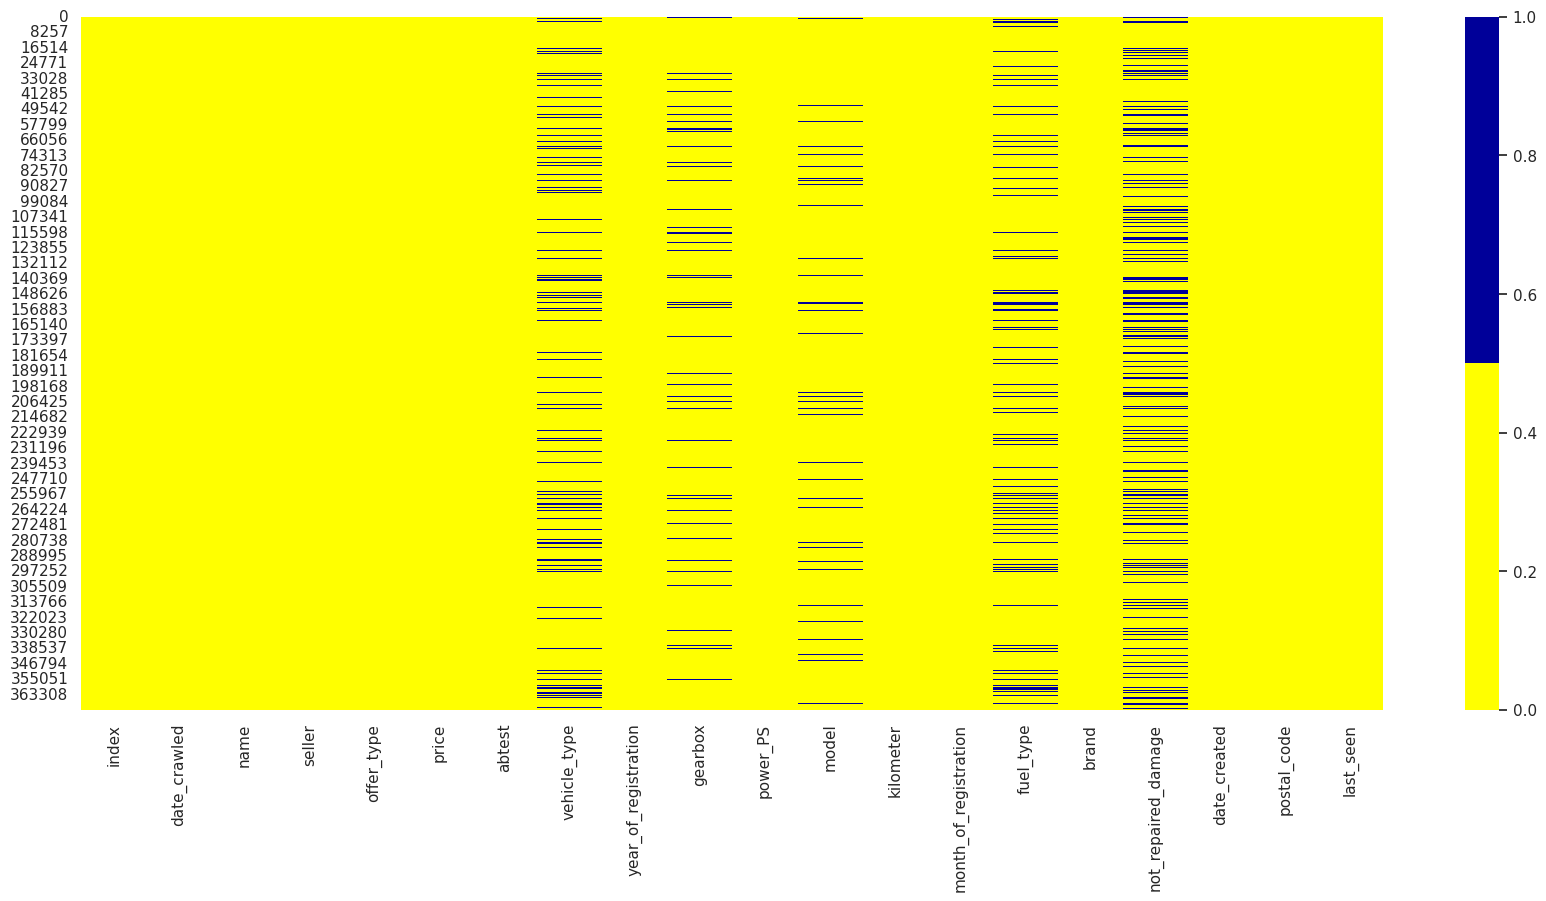

In [11]:
sns.set (rc = {'figure.figsize' : (21,9)})
cols = data.columns
colors = ['#ffff00', '#000099' ]
sns.heatmap(data[cols].isnull(), cmap = sns.color_palette(colors))
print(f'Количество пропущенных значений: {data.isnull().sum().sum()}')
print(f'Процент пропущенных значений: {round((data.isnull().sum().sum() / data.size) * 100, 3)} %')
#ffff00 - желтый цвет (значение есть), #000099 - синий цвет (значения нет)

In [12]:
data = data.fillna(value = 'Others')

### Поиск и удаление дубликатов

In [13]:
data.duplicated().value_counts()

False    371528
dtype: int64

Дубликатов в датасете не обнаружено.

### Типы данных в датафрейме: их определение и преобразование

Перевод полей в более удобные форматы

In [14]:
data['date_crawled'] = pd.to_datetime(data['date_crawled'])
data['date_created'] = pd.to_datetime(data['date_created'])
data['last_seen'] = pd.to_datetime(data['last_seen'])
data = data.astype(
    {'name': 'str',
     'seller': 'str',
     'offer_type': 'str',
     'abtest': 'str',
     'vehicle_type': 'str',
     'gearbox': 'str',
     'model': 'str',
     'fuel_type': 'str',
     'brand': 'str',
     'not_repaired_damage': 'str'})

### Значения в столбцах: перевод с немецкого на английский


В некоторых столбцах встерчаются значения на немецком языке. Для удобства переведу эти значения на английский с помощью нескольких функций.

In [15]:
# Функция перевода значений в столбце seller
def func_seller(x):
  if x == 'privat':
    return 'private'
  elif x == 'gewerblich':
    return 'commercial'
  else:
    return x

In [16]:
# Функция перевода значений в столбце offer_type
def func_offer_type(x):
  if x == 'Angebot':
    return 'offer'
  elif x == 'Gesuch':
    return 'request'
  else:
    return x

In [17]:
# Функция перевода значений в столбце vehicle_type
def func_vehicle_type(x):
  if x == 'kleinwagen':
    return 'small car'
  elif x == 'kombi':
    return 'station wagon'
  elif x == 'cabrio':
    return 'convertible'
  elif x == 'andere':
    return 'Others'
  else:
    return x

In [18]:
# Функция перевода значений в столбце gearbox
def func_gearbox(x):
  if x == 'manuell':
    return 'manual'
  elif x == 'automatik':
    return 'automatic'
  else:
    return x

In [19]:
# Функция перевода значений в столбце fuel_type
def func_fuel_type(x):
  if x == 'benzin':
    return 'petrol'
  elif x == 'andere':
    return 'Others'
  elif x == 'elektro':
    return 'electro'
  else:
    return x

In [20]:
# Функция перевода значений в столбце not_repaired_damage
def func_not_repaired_damage(x):
  if x == 'nein':
    return 'no'
  elif x == 'ja':
    return 'yes'
  else:
    return x

In [21]:
# Применяю ранее объявленные функции для переименования значений в столбцах 
data['seller'] = data['seller'].apply(func_seller)
data['offer_type'] = data['offer_type'].apply(func_offer_type)
data['vehicle_type'] = data['vehicle_type'].apply(func_vehicle_type)
data['gearbox'] = data['gearbox'].apply(func_gearbox)
data['fuel_type'] = data['fuel_type'].apply(func_fuel_type)
data['not_repaired_damage'] = data['not_repaired_damage'].apply(func_not_repaired_damage)

### Логические ошибки

Эра автомобилестроения началась в 1886 году и продолжается до сих пор. Следовательно, значения в поле year_of_registration могут лежать только в диапазоне от 1886 до 2023 включительно.

In [22]:
# Проверяю датасет
data['year_of_registration'].value_counts()

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
        ...  
2066        1
9450        1
3200        1
1925        1
3500        1
Name: year_of_registration, Length: 155, dtype: int64

In [23]:
# Удаляю строки с некорректными значениями
data = data[(data['year_of_registration'] >= 1886) & (data['year_of_registration'] <= 2023)]

Самый мощный автомобильный двигатель имеет показатель power_PS (количество лошадиных сил) 2000. Следовательно, значения в поле power_PS могут лежать только в диапазоне от 1 до 2000.

In [24]:
# Проверяю датасет
data.groupby('power_PS').count()

,index,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,model,kilometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
power_PS,,,,,,,,,,,,,,,,,,,
0,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686,40686
1,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
2,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17932,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19208,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19211,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [25]:
# Удаляю строки с некорректными значениями
data = data[(data['power_PS'] >= 1) & (data['power_PS'] <= 2000)]

### Построение матрицы корреляции

<Axes: >

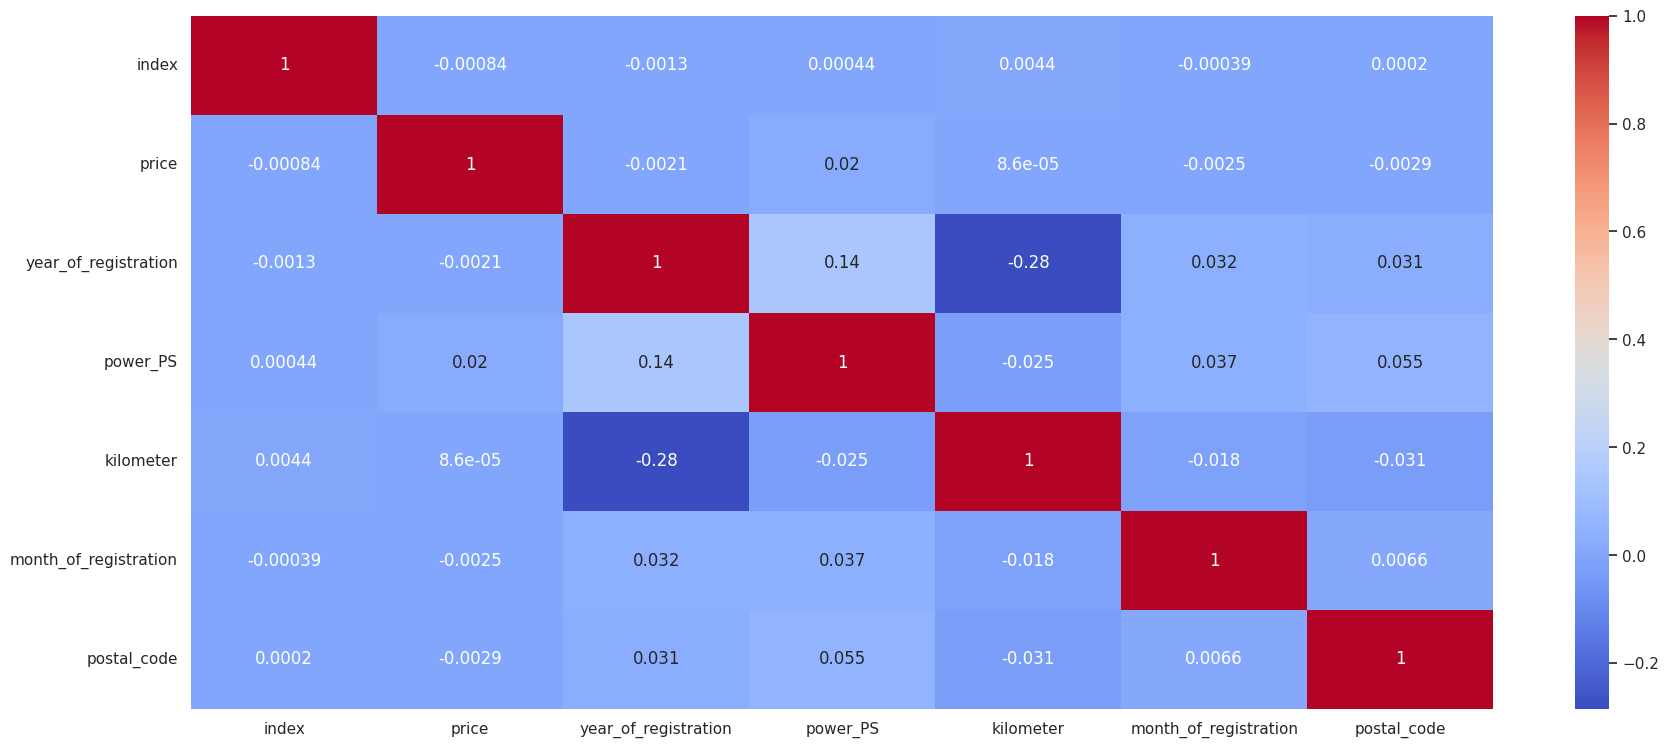

In [26]:
corr_matrix = data.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### График денежной емкости рынка по Типам машины

In [27]:
vehicle_type_sum = data['price'].groupby(data['vehicle_type']).agg(volume = 'sum').sort_values(by = 'volume', ascending = False)

In [28]:
vehicle_type_sum

,volume
vehicle_type,
Others,2421517748
limousine,1045530998
station wagon,499733404
coupe,479471361
small car,344331753
convertible,336224984
bus,202712651
suv,186916328


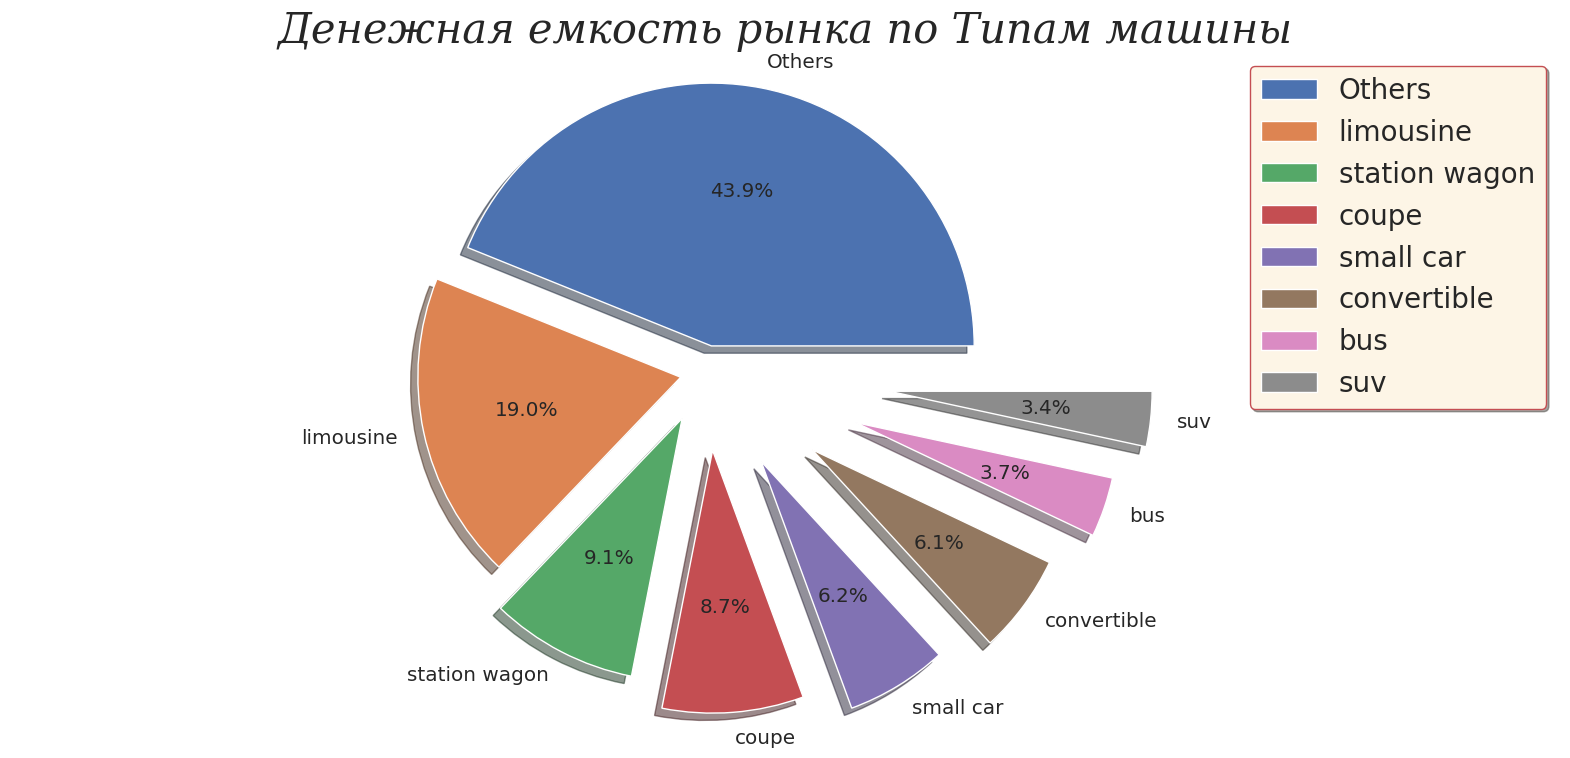

In [29]:
plt.figure(figsize=(20,9))
plt.title('Денежная емкость рынка по Типам машины', 
          fontsize = 30, 
          fontfamily = 'serif', 
          fontstyle = 'italic')
labels = list(vehicle_type_sum.index)
explode = (0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7)
plt.pie(list(vehicle_type_sum.loc[:, 'volume']), 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        textprops={'size': 'large'}, 
        shadow=True, 
        startangle=0)
plt.axis('equal')
plt.legend(shadow = True, 
          fontsize = 20, 
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r')
plt.show()

### График количества автомобилей по Типам машины

In [30]:
vehicle_type_count = data['price'].groupby(data['vehicle_type']).agg(volume = 'count').sort_values(by = 'volume', ascending = False)

In [31]:
vehicle_type_count

,volume
vehicle_type,
limousine,89180
small car,71678
station wagon,62849
bus,27905
Others,25722
convertible,21641
coupe,17811
suv,13752


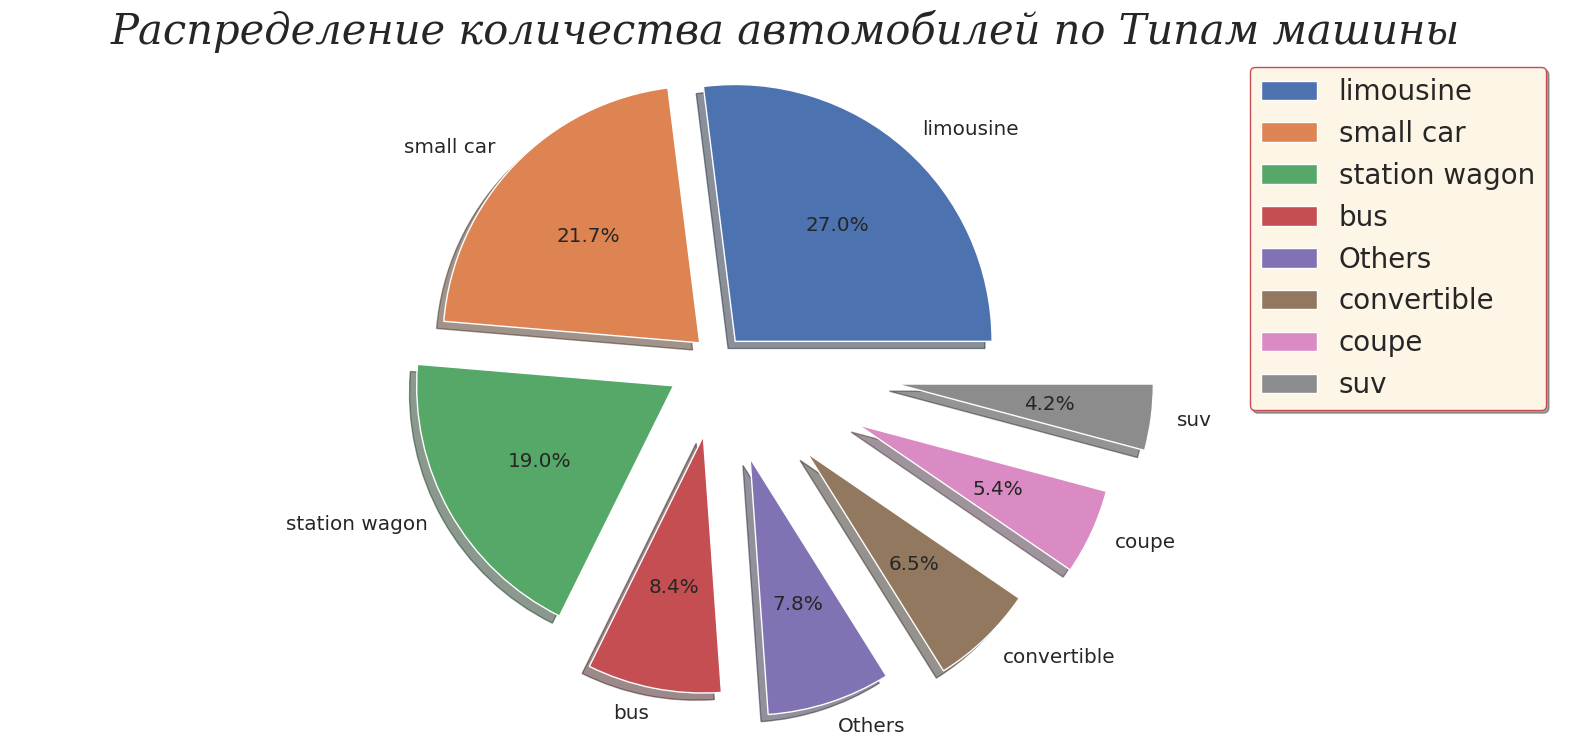

In [32]:
plt.figure(figsize=(20,9))
plt.title('Распределение количества автомобилей по Типам машины', 
          fontsize = 30, 
          fontfamily = 'serif', 
          fontstyle = 'italic')
labels = list(vehicle_type_count.index)
explode = (0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7)
plt.pie(list(vehicle_type_count.loc[:, 'volume']), 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        textprops={'size': 'large'}, 
        shadow=True, 
        startangle=0)
plt.axis('equal')
plt.legend(shadow = True, 
          fontsize = 20, 
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r')
plt.show()

### График распределения числа автомобилей в зависимости от километров пробега

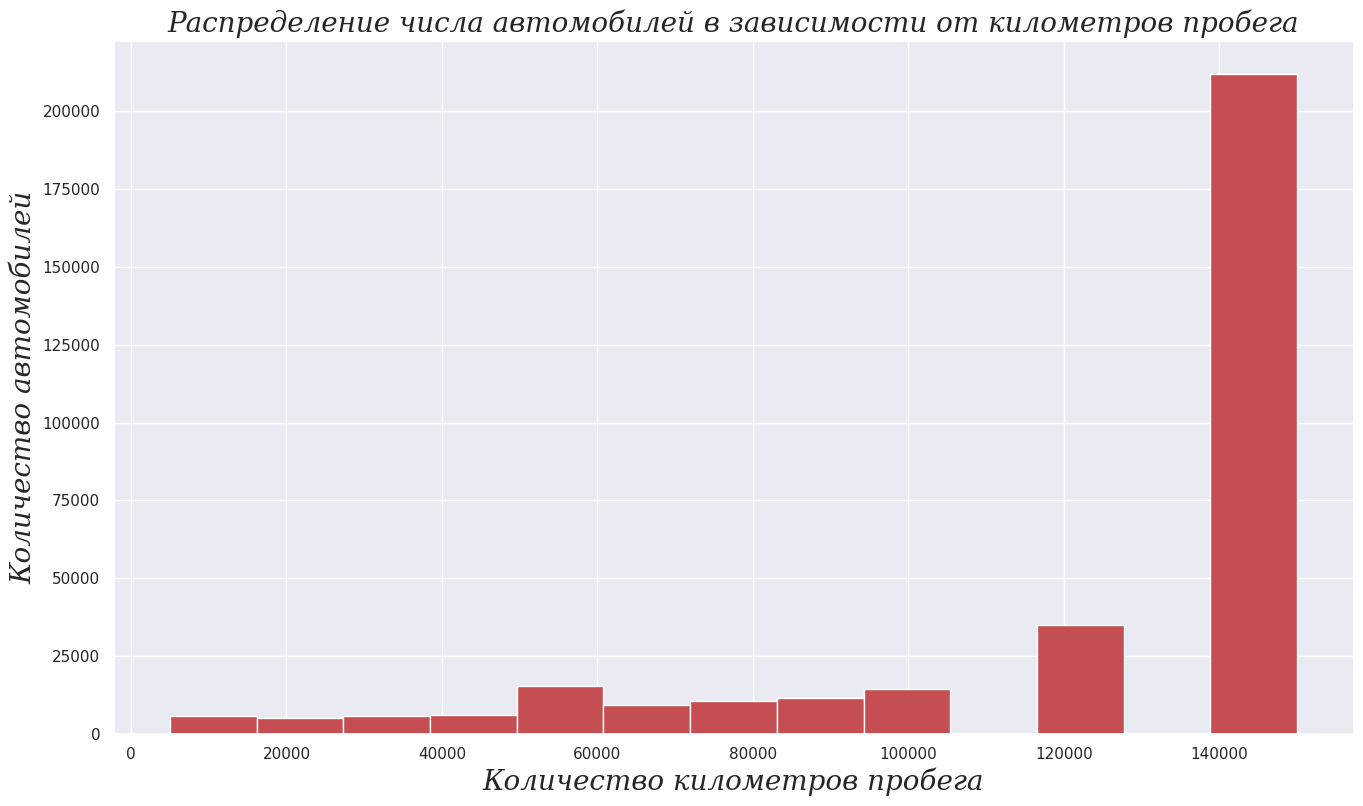

In [33]:
plt.figure(figsize = (16,9))
plt.title('Распределение числа автомобилей в зависимости от километров пробега', 
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 20)
plt.xlabel('Количество километров пробега', 
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 20)
plt.ylabel('Количество автомобилей',
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 20)
data['kilometer'].hist(bins = 13, color = 'r')
plt.show()

### График количества машин по Брендам

In [34]:
data['brand'].value_counts()

volkswagen        71322
bmw               37142
opel              35081
mercedes_benz     31633
audi              30433
ford              22268
renault           14987
peugeot            9843
fiat               8206
seat               6403
skoda              5241
mazda              5056
smart              4656
citroen            4534
nissan             4360
toyota             4241
hyundai            3292
mini               3262
volvo              3049
mitsubishi         2687
honda              2564
sonstige_autos     2516
kia                2292
alfa_romeo         2115
suzuki             2056
porsche            2034
chevrolet          1597
chrysler           1249
dacia               829
jeep                728
subaru              699
land_rover          693
daihatsu            658
jaguar              556
saab                497
daewoo              434
lancia              427
rover               408
trabant             327
lada                163
Name: brand, dtype: int64

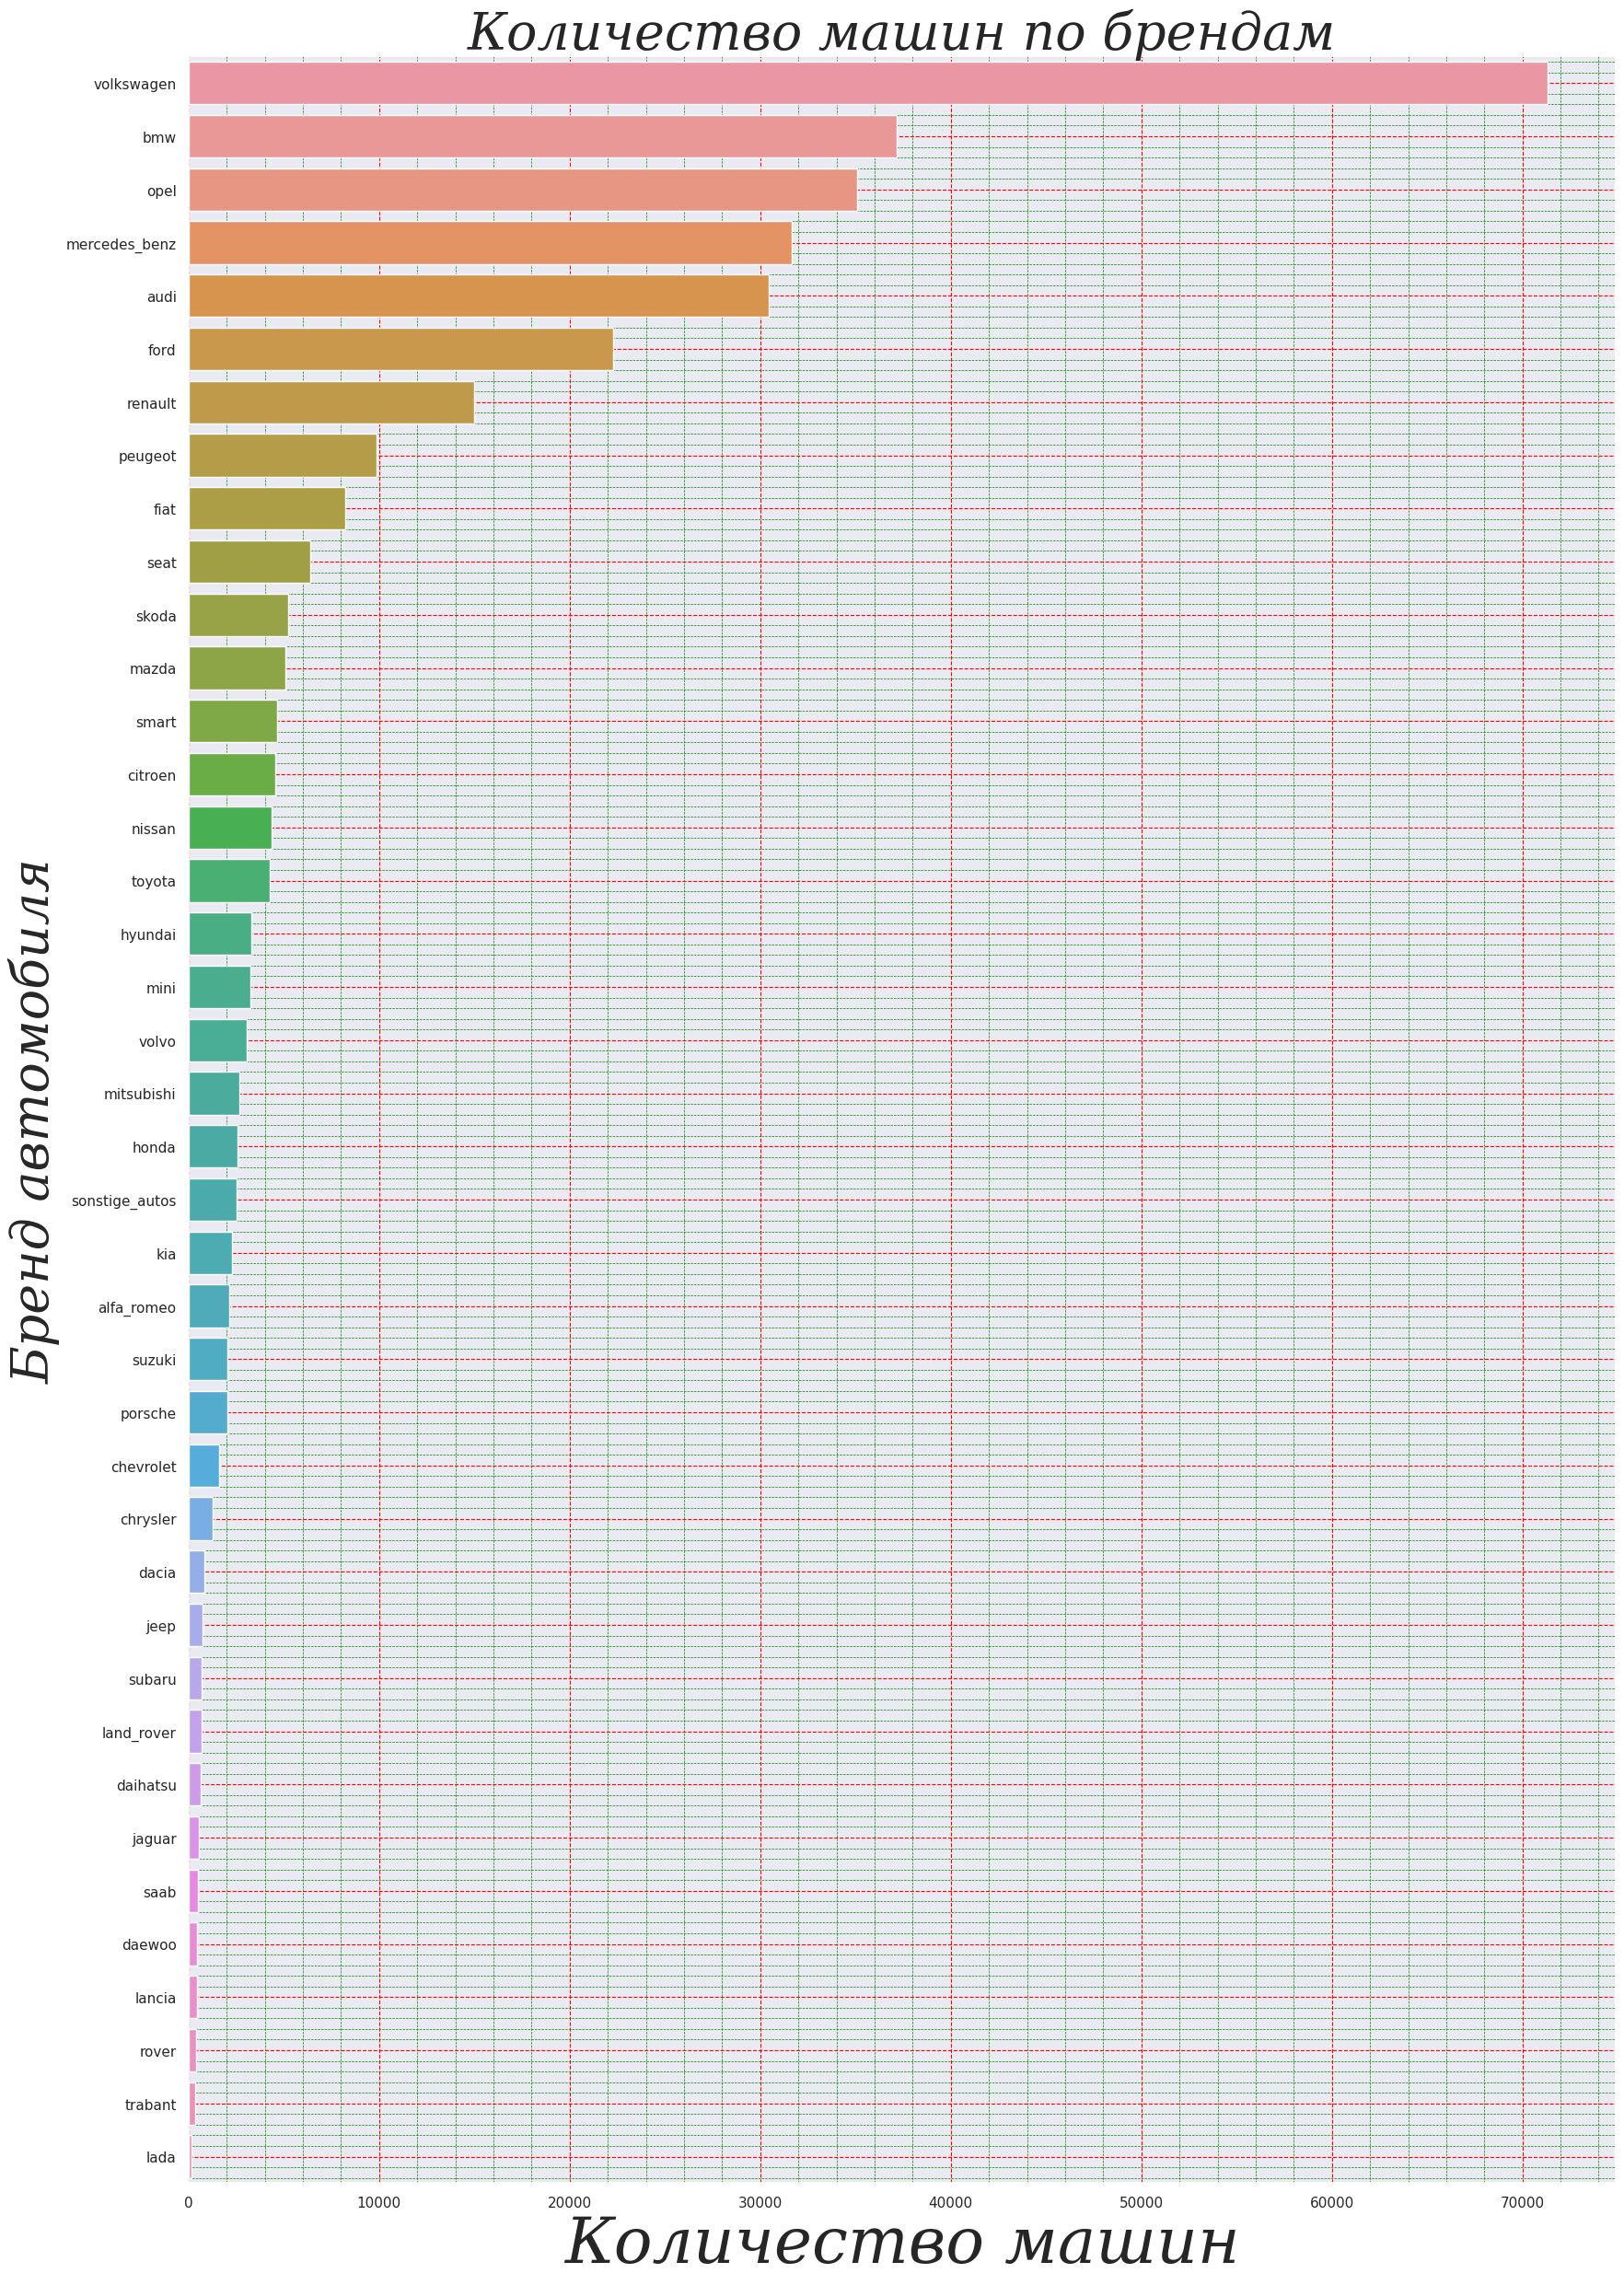

In [35]:
plt.figure(figsize = (20,30))
sns.countplot(y=data['brand'],order=data['brand'].value_counts().index)
plt.title('Количество машин по брендам', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 40)
plt.xlabel('Количество машин', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 50)
plt.ylabel('Бренд автомобиля', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 40)
plt.minorticks_on()
plt.grid(which = 'major', color = 'red', linewidth = 0.8, linestyle = '--')
plt.grid(which = 'minor', color = 'green', linewidth = 0.5, linestyle = '--')
plt.show()

### График по графе power_PS (количество лошадиных сил двигателя)

<Figure size 1600x900 with 0 Axes>

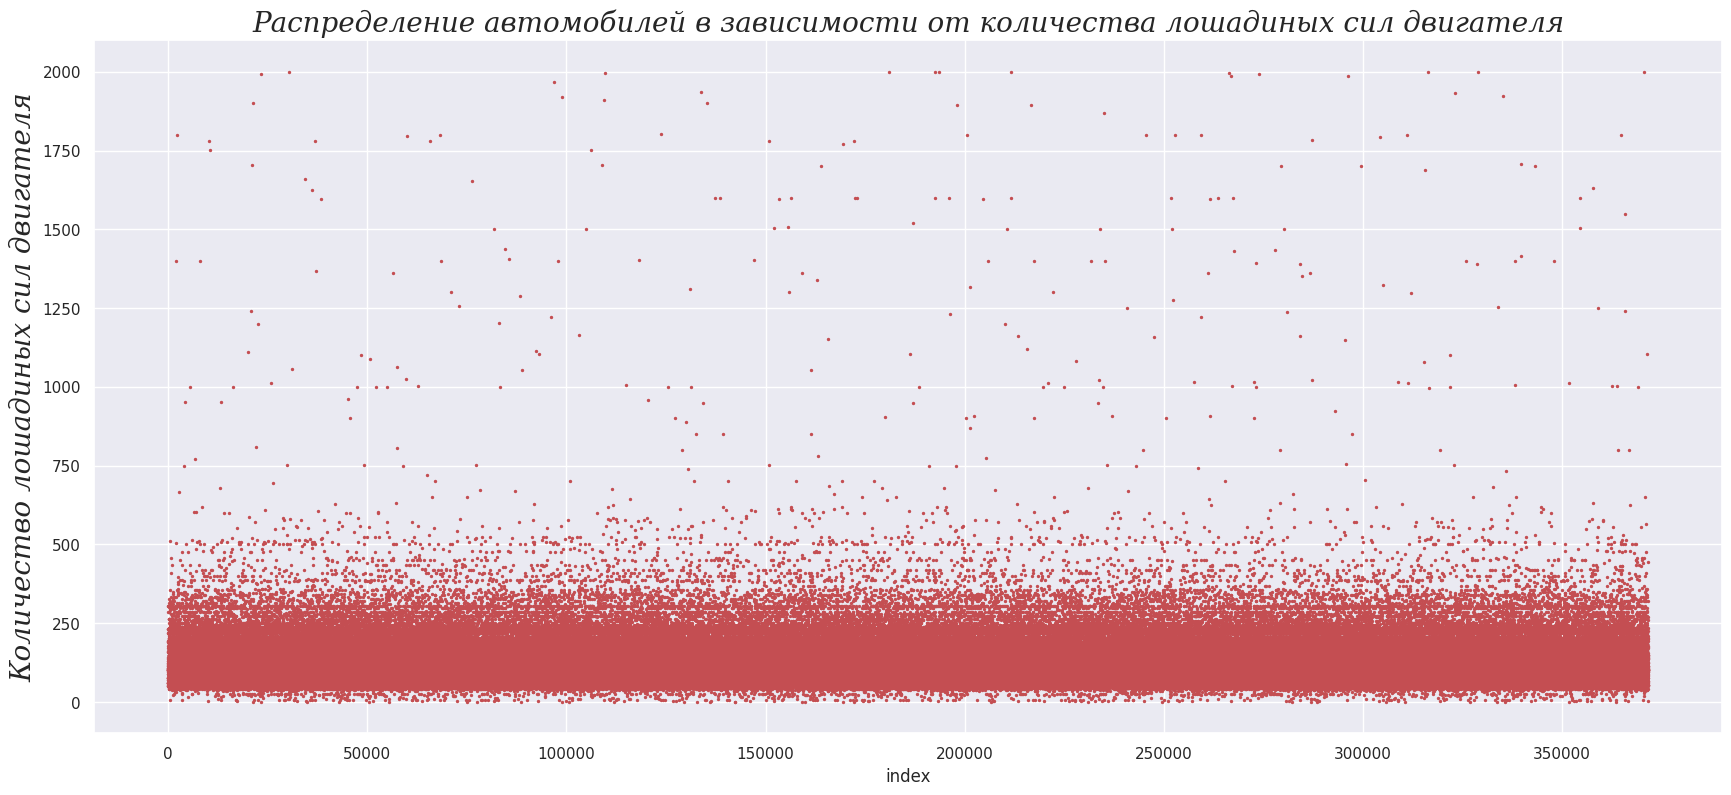

In [36]:
plt.figure(figsize = (16,9))
data.plot(kind = 'scatter', x = 'index', y = 'power_PS', s = 2, color = 'r')
plt.title('Распределение автомобилей в зависимости от количества лошадиных сил двигателя', 
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 20)
plt.ylabel('Количество лошадиных сил двигателя',
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 20)
plt.show()

### График по графе year_of_registration

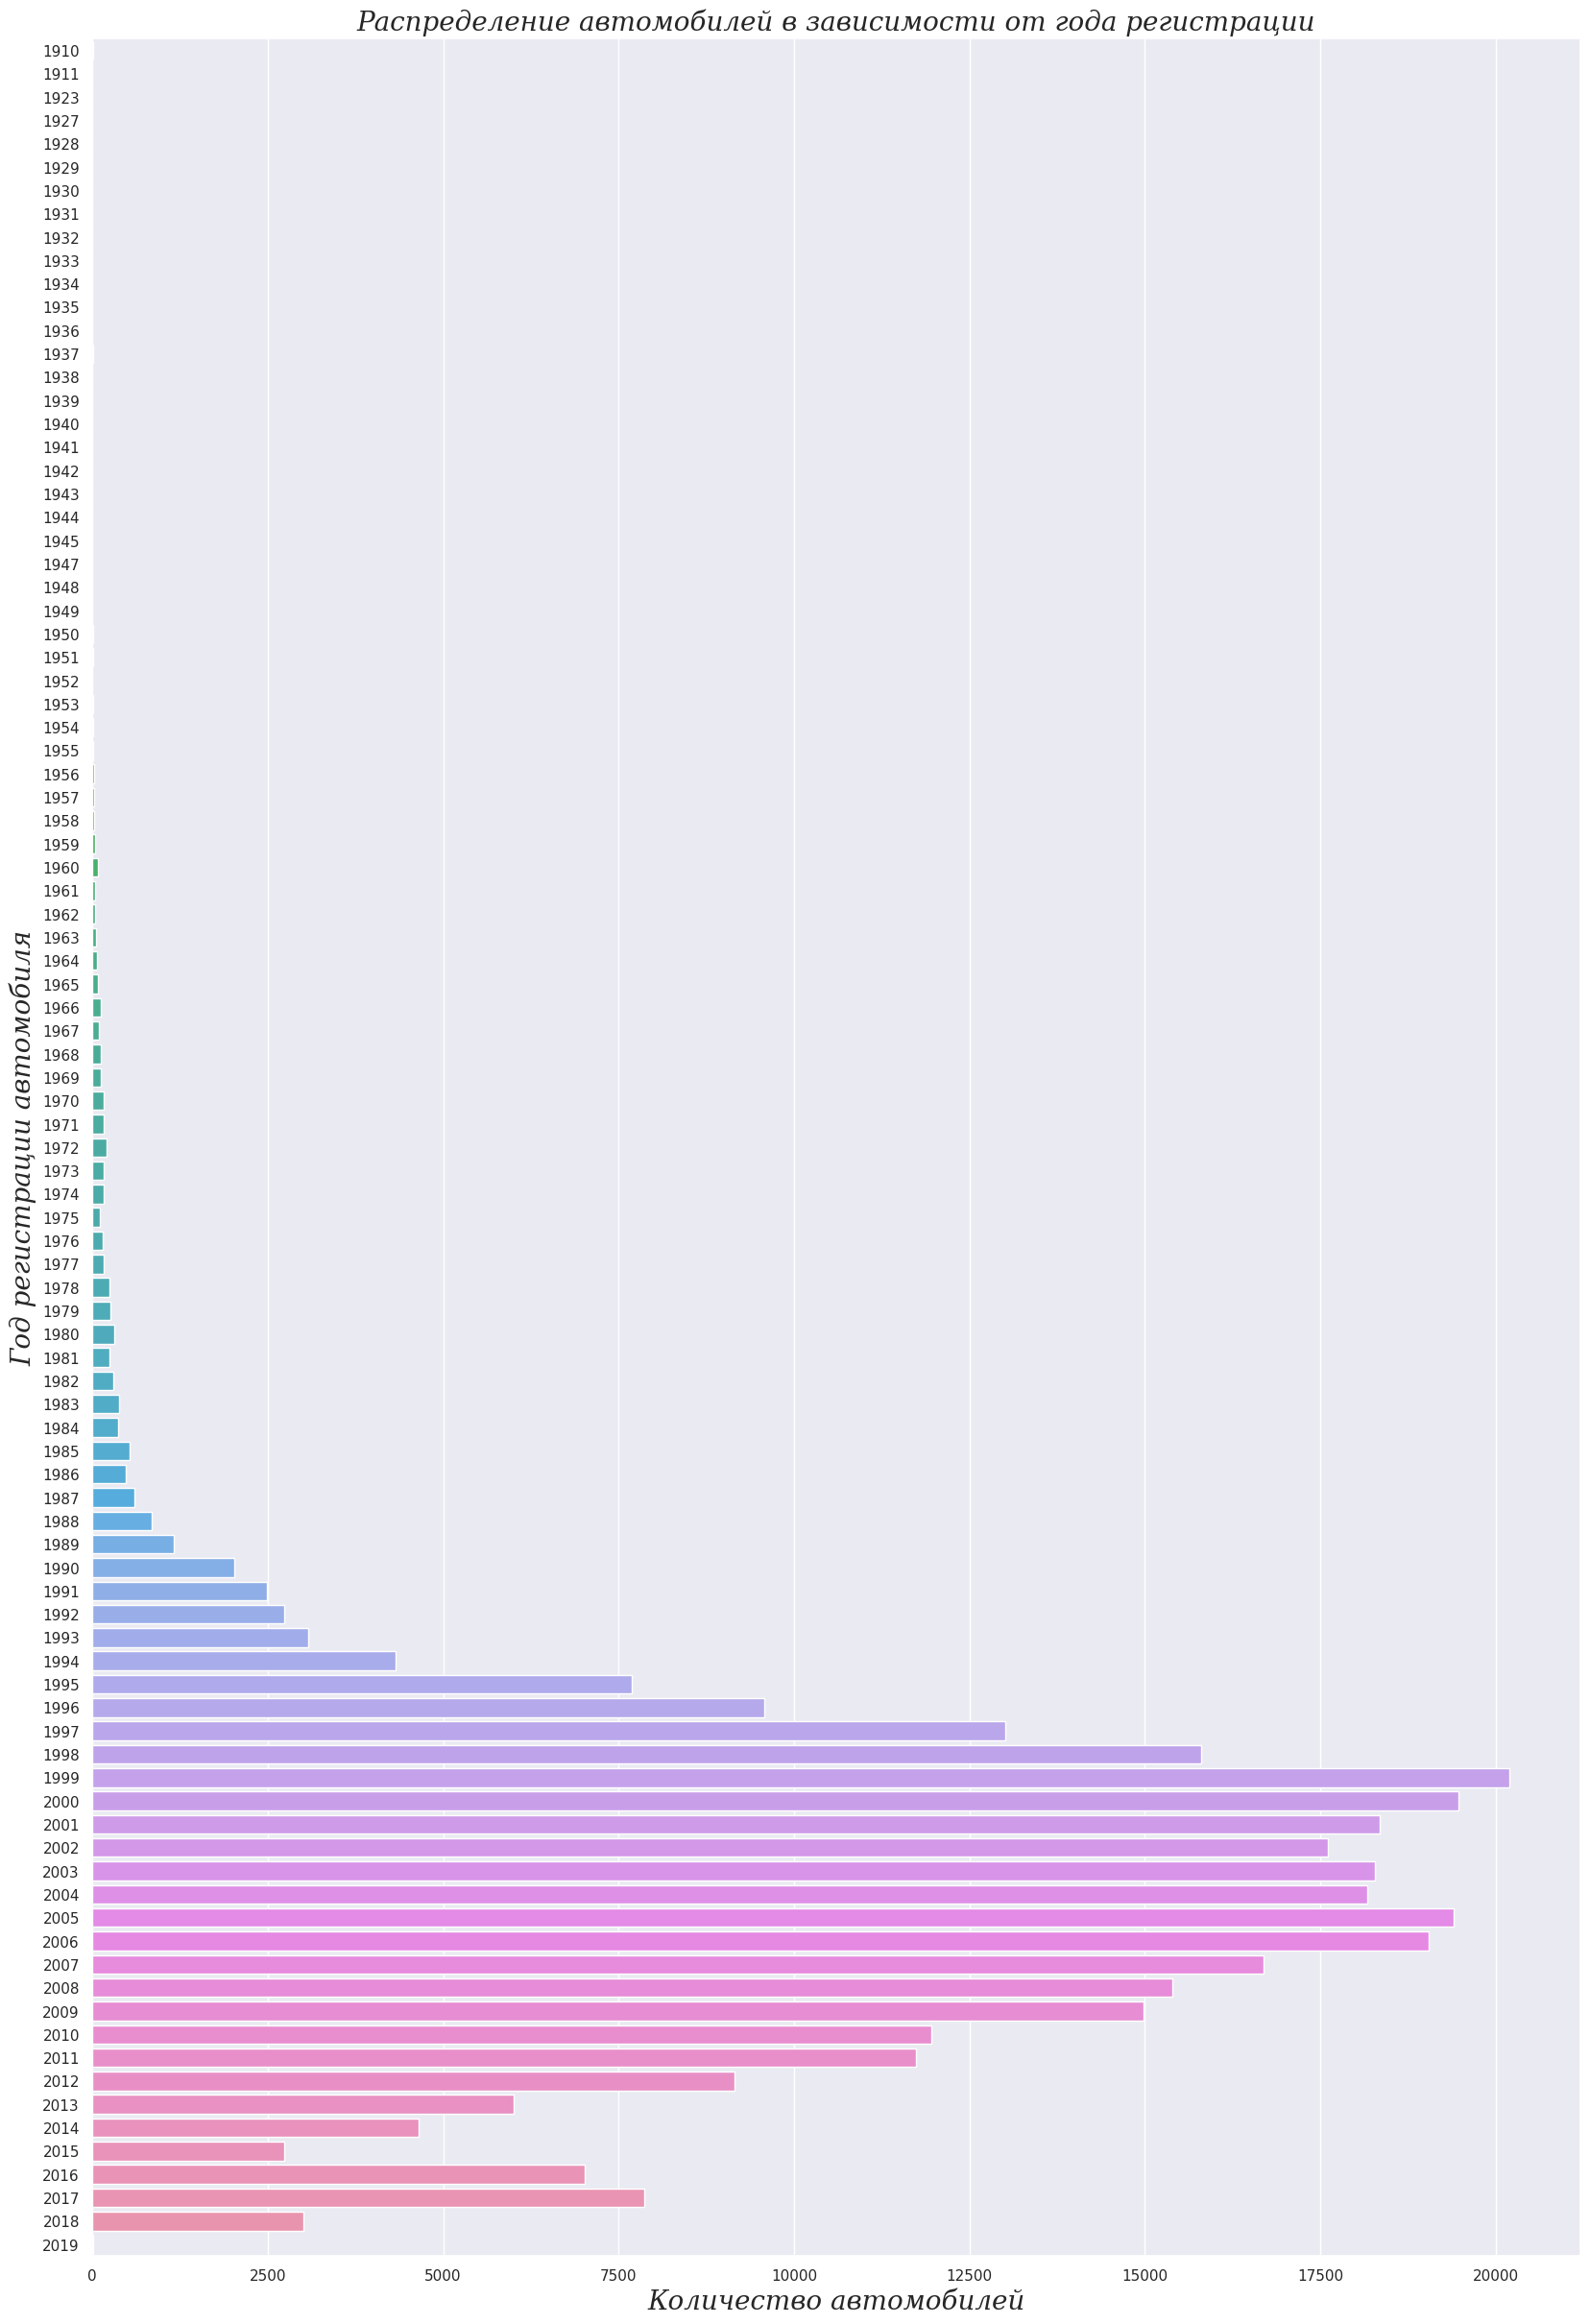

In [38]:
plt.figure(figsize = (20,30))
sns.countplot(y = 'year_of_registration', data = data)
plt.title('Распределение автомобилей в зависимости от года регистрации', 
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 20)
plt.xlabel('Количество автомобилей',
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 20)
plt.ylabel('Год регистрации автомобиля',
          fontfamily = 'serif',
          fontstyle = 'italic',
          fontsize = 20)
plt.show()

### График распределения количества автомобилей по Типам коробки передач

In [39]:
gearbox_count = data['price'].groupby(data['gearbox']).agg(volume = 'count').sort_values(by = 'volume', ascending = False)

In [40]:
gearbox_count

,volume
gearbox,
manual,251851
automatic,72056
Others,6631


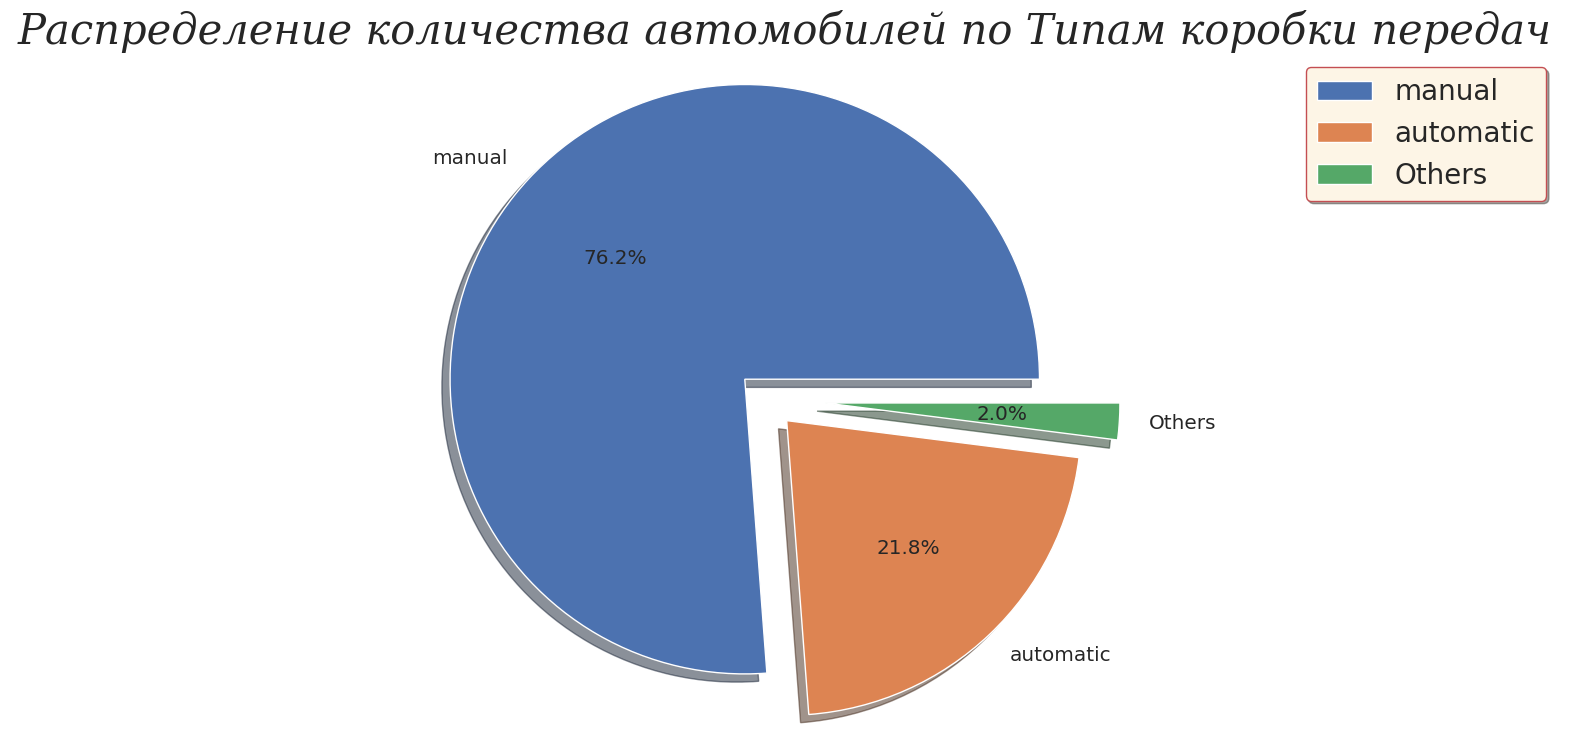

In [41]:
plt.figure(figsize=(20,9))
plt.title('Распределение количества автомобилей по Типам коробки передач', 
          fontsize = 30, 
          fontfamily = 'serif', 
          fontstyle = 'italic')
labels = list(gearbox_count.index)
explode = (0.1, 0.1, 0.2)
plt.pie(list(gearbox_count.loc[:, 'volume']), 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        textprops={'size': 'large'}, 
        shadow=True, 
        startangle=0)
plt.axis('equal')
plt.legend(shadow = True, 
          fontsize = 20, 
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r')
plt.show()

### Денежная емкость рынка по типам коробки передач

In [42]:
gearbox_sum = data['price'].groupby(data['gearbox']).agg(volume = 'sum').sort_values(by = 'volume', ascending = False)

In [43]:
gearbox_sum

,volume
gearbox,
manual,4198512406
automatic,1141318870
Others,176607951


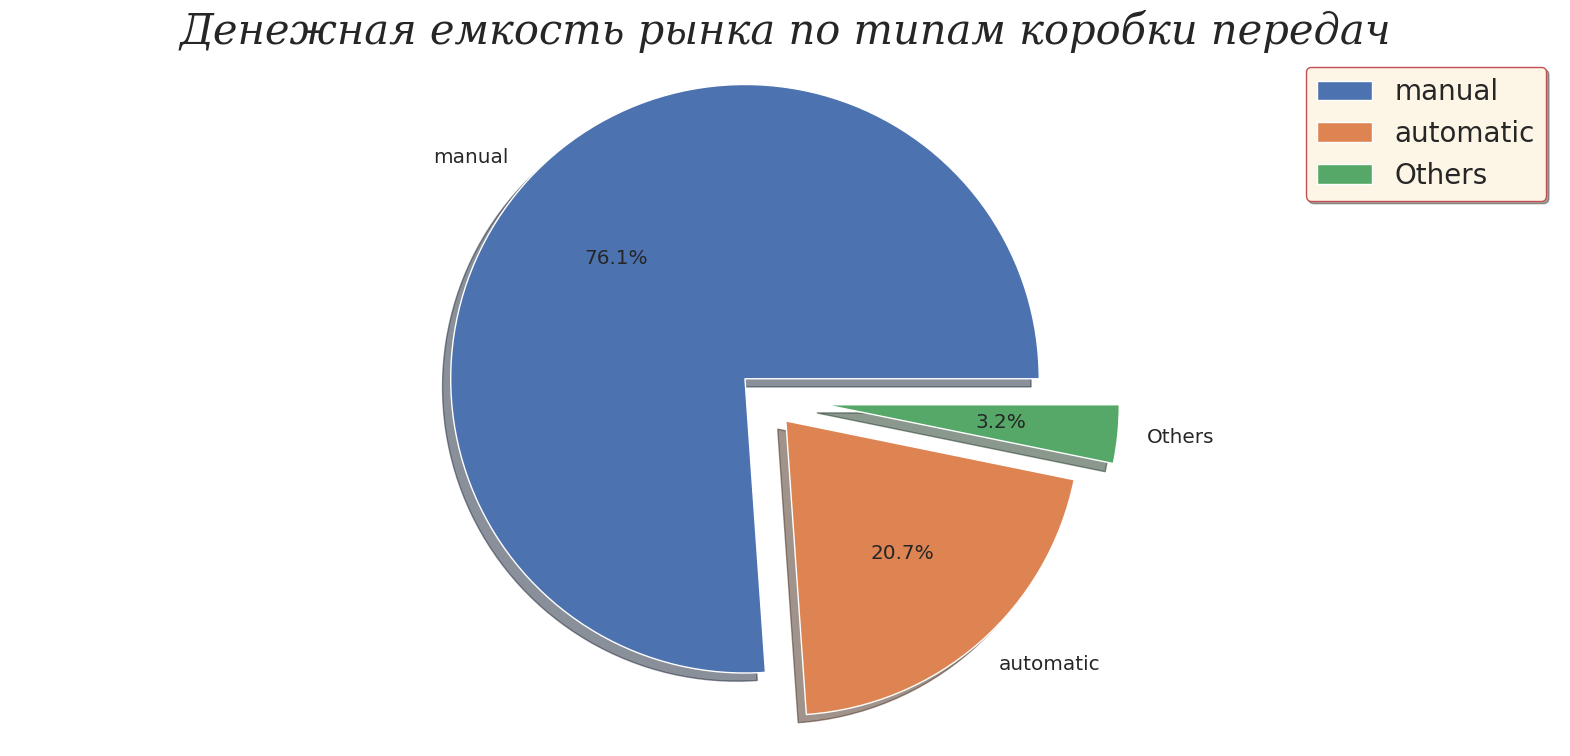

In [44]:
plt.figure(figsize=(20,9))
plt.title('Денежная емкость рынка по типам коробки передач', 
          fontsize = 30, 
          fontfamily = 'serif', 
          fontstyle = 'italic')
labels = list(gearbox_sum.index)
explode = (0.1, 0.1, 0.2)
plt.pie(list(gearbox_sum.loc[:, 'volume']), 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        textprops={'size': 'large'}, 
        shadow=True, 
        startangle=0)
plt.axis('equal')
plt.legend(shadow = True, 
          fontsize = 20, 
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r')
plt.show()

### График распределения количества автомобилей по типу топлива

In [45]:
fuel_type_count = data['price'].groupby(data['fuel_type']).agg(volume = 'count').sort_values(by = 'volume', ascending = False)

In [46]:
fuel_type_count

,volume
fuel_type,
petrol,203575
diesel,99555
Others,21578
lpg,4980
cng,511
hybrid,250
electro,89


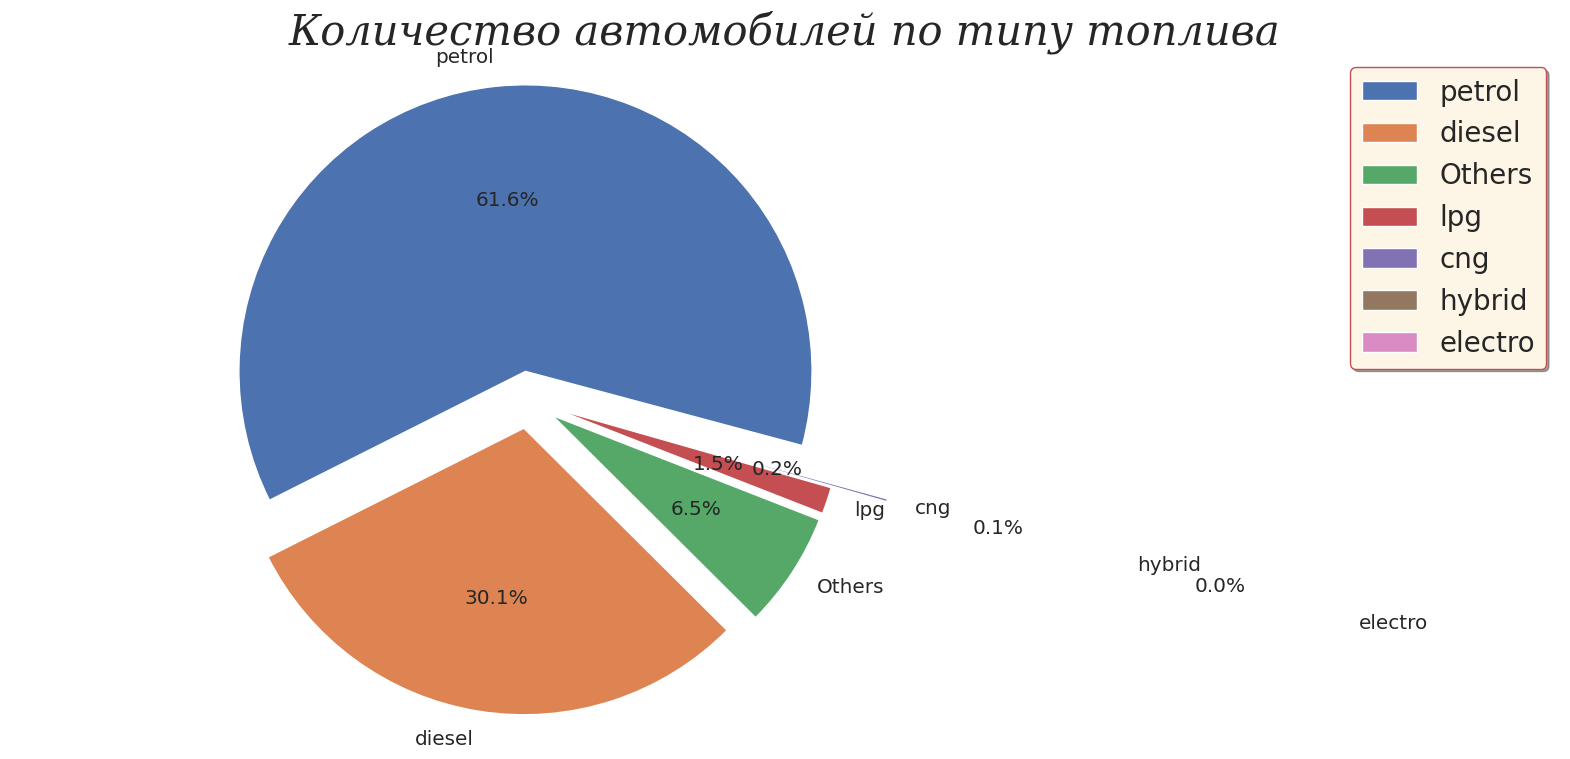

In [47]:
plt.figure(figsize=(20,9))
plt.title('Количество автомобилей по типу топлива', 
          fontsize = 30, 
          fontfamily = 'serif', 
          fontstyle = 'italic')
labels = list(fuel_type_count.index)
explode = (0.1, 0.1, 0.1, 0.1, 0.3, 1.1, 1.9)
plt.pie(list(fuel_type_count.loc[:, 'volume']), 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        textprops={'size': 'large'}, 
        #shadow=True, 
        startangle=-15)
plt.axis('equal')
plt.legend(shadow = True, 
          fontsize = 20, 
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r')
plt.show()

### Денежная емкость рынка по типу топлива



In [48]:
fuel_type_sum = data['price'].groupby(data['fuel_type']).agg(volume = 'sum').sort_values(by = 'volume', ascending = False)

In [49]:
fuel_type_sum

,volume
fuel_type,
Others,2706554852
petrol,1631443749
diesel,1116190453
lpg,54739346
hybrid,3569769
cng,2483527
electro,1457531


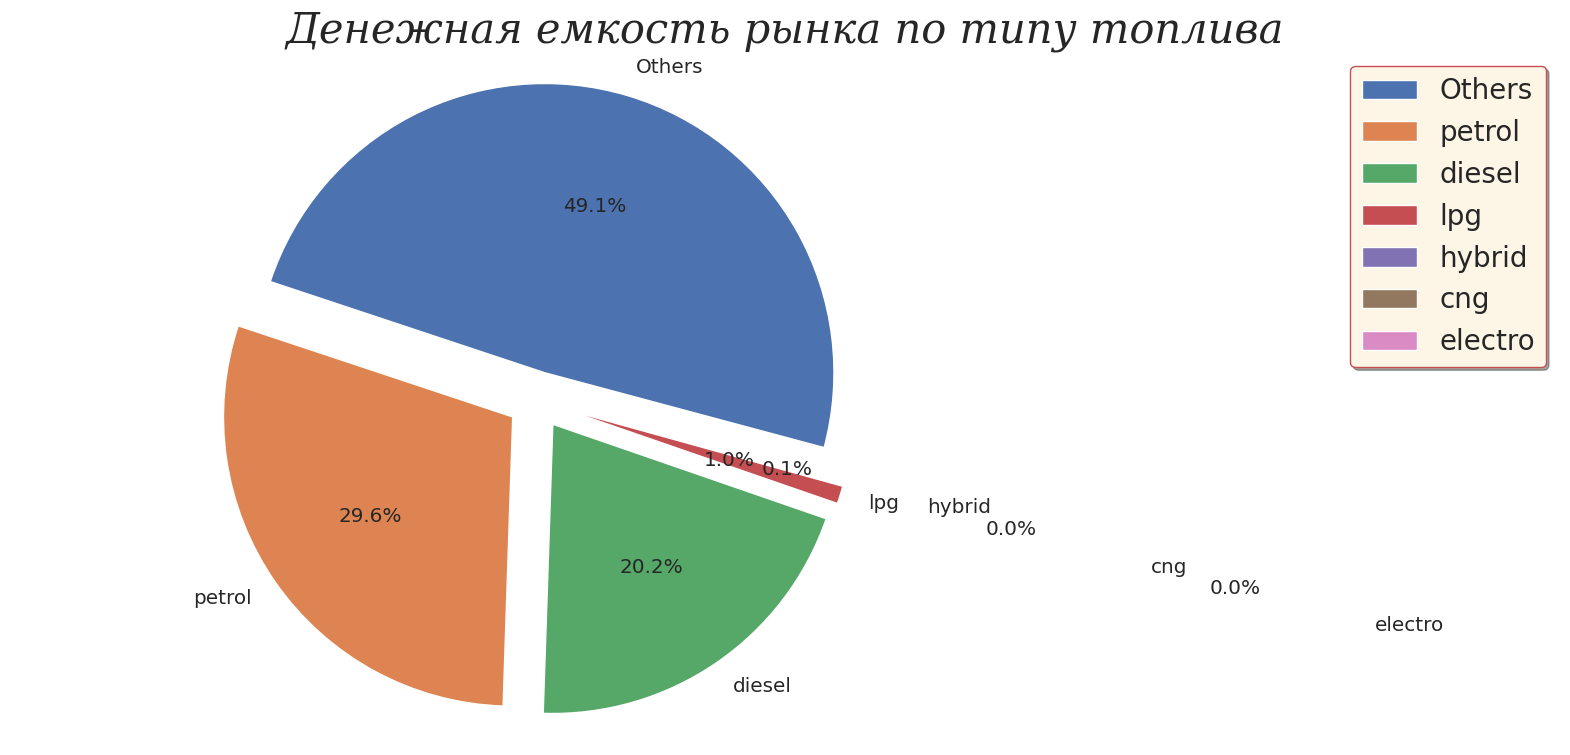

In [50]:
plt.figure(figsize=(20,9))
plt.title('Денежная емкость рынка по типу топлива', 
          fontsize = 30, 
          fontfamily = 'serif', 
          fontstyle = 'italic')
labels = list(fuel_type_sum.index)
explode = (0.1, 0.1, 0.1, 0.1, 0.3, 1.1, 1.9)
plt.pie(list(fuel_type_sum.loc[:, 'volume']), 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%', 
        textprops={'size': 'large'}, 
        #shadow=True, 
        startangle=-15)
plt.axis('equal')
plt.legend(shadow = True, 
          fontsize = 20, 
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r')
plt.show()

### Денежная емкость рынка по году регистрации автомобиля

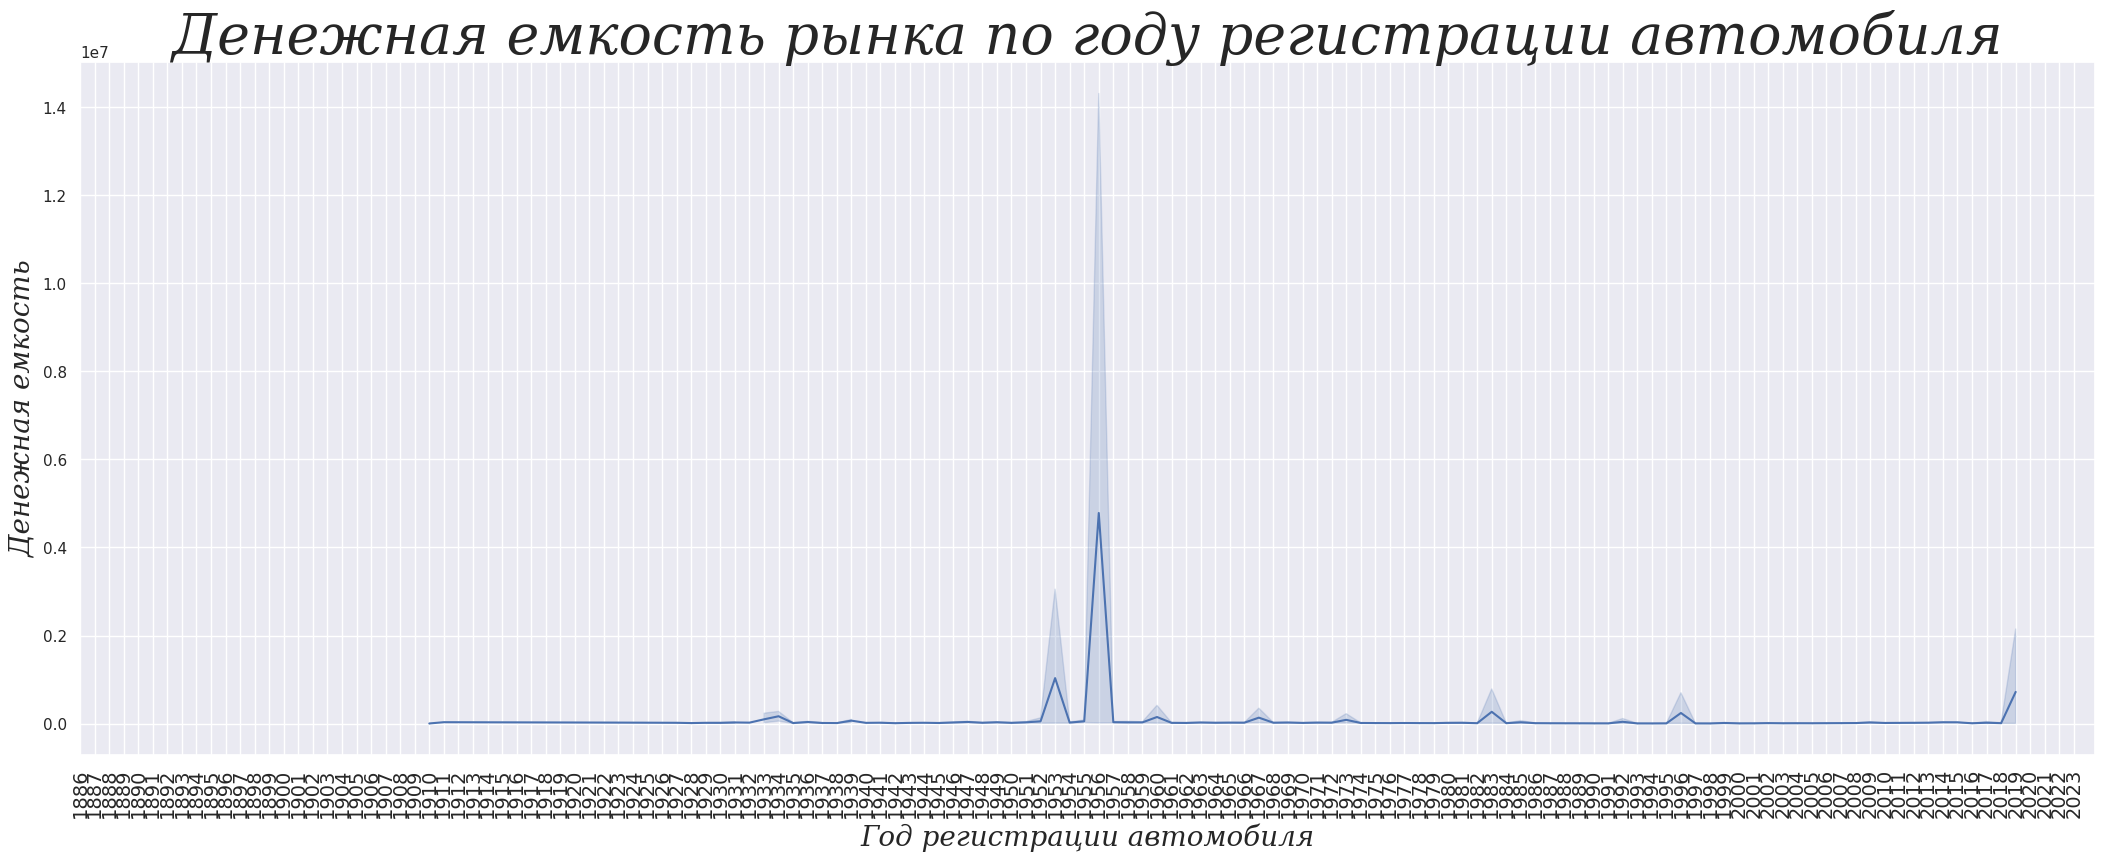

In [51]:

plt.figure(figsize = (26,9))
sns.lineplot(x=data['year_of_registration'], y=data['price'])
plt.title('Денежная емкость рынка по году регистрации автомобиля', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 40)
plt.xlabel('Год регистрации автомобиля', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 20)
plt.ylabel('Денежная емкость', fontfamily = 'serif',
                fontstyle = 'italic',fontsize = 20)
plt.xticks(range(1886, 2024, 1), fontsize = 14, rotation=90)
#plt.minorticks_on()
#plt.grid(which = 'major', color = 'red', linewidth = 0.8, linestyle = '--')
#plt.grid(which = 'minor', color = 'green', linewidth = 0.5, linestyle = '--')
plt.show()